# Reto 4 
### Ahora, utilizando técnicas de aprendizaje no supervisado, trata de identificar temas, “protagonistas” u otras entidades de las noticias

In [1]:
import json
import numpy as np
import spacy 
!python -m spacy download en_core_web_sm #Downloas pre-traindes spacy model URL : https://spacy.io/models
import pandas as pd
import matplotlib.pyplot as plt
import time

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
#Read the news
news = {}
for index,line in enumerate(open('../data/News_Category_Dataset_v2.json', 'r')):
    news[index]=json.loads(line)

In [3]:
def entities_extractor(text,nlp):
    '''
    Function to extrac the entites with a nlp model for a text
    It works with spacy, please see URL: https://spacy.io/usage/linguistic-features#named-entities
    Parameters
    ----------
    text: str
        text to extract entities
    '''
    entitie = []
    type_entitie = []
    doc = nlp(text)
    for ent in doc.ents:
        entitie.append(ent.text)
        type_entitie.append(ent.label_)
    return entitie, type_entitie

In [4]:
def news_entities(news,nlp):
    '''
    Function to extrac all entities in the news
    '''
    all_entis =[]
    all_types =[]
    for k in news.keys():
        entitie, type_entitie = entities_extractor(news[k]['headline']+'. '+news[k]['short_description'],nlp)
        all_entis.append(entitie)
        all_types.append(type_entitie)
    flatten = lambda t: [item for sublist in t for item in sublist]
    all_entis = flatten(all_entis)
    all_types = flatten(all_types)
    df = pd.DataFrame({'Entities':all_entis,'types':all_types})
    return df

In [7]:
start_time = time.time()
nlp = spacy.load("en_core_web_sm")
df = news_entities(news,nlp)
df.to_csv('../data/entities_data.csv')
print("--- %s seconds ---" % (time.time() - start_time))

--- 2991.824168920517 seconds ---


In [8]:
df = pd.read_csv('../data/entities_data.csv')

In [19]:
df.head(19)

Unnamed: 0                                   Entities     types
0            0                                      Texas       GPE
1            1                                  Last Week      DATE
2            2                                     Only 1  CARDINAL
3            3                           Just another day      DATE
4            4                                    America       GPE
5            5                                 Will Smith    PERSON
6            6                                      Diplo    PERSON
7            7                                  Nicky Jam    PERSON
8            8                       The 2018 World Cup's     EVENT
9            9                         Hugh Grant Marries    PERSON
10          10                                     Age 57      DATE
11          11                             Anna Eberstein    PERSON
12          12                                 Jim Carrey    PERSON
13          13                                  Democrats      NORP
14          14                                New Artwork       GPE
15          15                                       Dems      NORP
16          16                               Donald Trump    PERSON
17          17  Julianna Margulies Uses Donald Trump Poop       ORG
18          18                                   Dietland   PRODUCT

In [22]:
df.types.iloc[17]

'ORG'

In [25]:
def stats_plot(df,type_,num_ob=15):
    '''
    Function to plot the principal entities for a category `type_`
    
    Parameters
    ----------
    df: pandas.DataFrame
        pandas with the count of entities ('ORG','PERSON','EVENT', 'DATE', 'GPE' (Geopolitic entities),...) to see others entites
        please visit URL: https://spacy.io/usage/linguistic-features#named-entities 
    type_: str
        type of entitie that you want see 
    num_ob: int
        Number of principal entities that I want see
    '''
    unique, counts = np.unique(df[df.types == type_]['Entities'].values, return_counts=True)
    df_ents = pd.DataFrame({"Entities":unique,"Counts":counts}).sort_values('Counts',ascending=False)
    ax = df_ents.iloc[0:num_ob].plot.bar(x='Entities', y='Counts')
    plt.ylabel('Counts')
    plt.show()

# Results

## Principal persons mentioned in the news

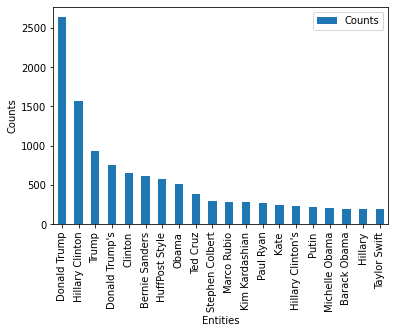

In [11]:
stats_plot(df,'PERSON',num_ob=20)

## Proncipal organizations mentioned in the news

In [37]:
stats_plot(df,'ORG',num_ob=20) #Probema de último minuto con la forma de escritura de las entidades, pero funciona el extractor :)

['Julianna Margulies Uses Donald Trump Poop' "Morgan Freeman '" 'McDonald'
 ... 'Giants' 'Patriots' 'KTVU']


TypeError: '<' not supported between instances of 'str' and 'float'

## Princiapl events mentioned in the news

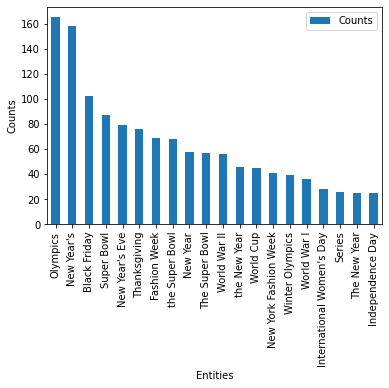

In [14]:
stats_plot(df,'EVENT',num_ob=20)

## Princiapl geopolitic entities mentioned in the news

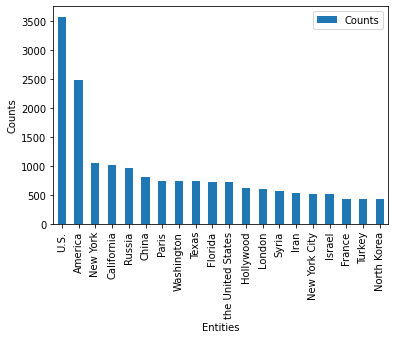

In [15]:
stats_plot(df,'GPE',num_ob=20)